# Motivation
The end-term paper for the Probability course, undertaken in the third semester, had a question about linear regression. The question established that there is some linear correlation between the marks a student scores in their assignment and their end-term papers.\
We were supposed to find this linear relation.\
Now, I want to explore the difference between the answers from two methods, one being the classical mathematics apporaoch taught to us and the other being the approach that uses machine learning model.\
Based on the outcome, we will be able to acertain the closeness of each method. 

# Methodology
The question itself has a very small dataset, because the question was supposed to be done in an examination using only calsulators and matrix multiplication.\
That being said, I will convert the data given in the question into a .csv type file and then use Pandas to manipulate the dataframe and run the regression model. There will not be a test-train split, because I am not making a prediction model, I am interested in getting the parameters of the linear regression.\
On the flip side of the project, I will use tensors to condeuct matrix multiplication and get the answers.\
I will then compare both.

# The Question
Students in a probability course claimed that doing the assignments
had not helped prepare them for the end-term exam. The end-term exam score
y and assignment score x (averaged up to the time of the end-term) for the
n = 18 students in the class are in the table below as:

x | 96 77 0 0 78 64 89 47 90 93 18 86 0 30 59 77 74 67\
y | 95 80 0 0 79 77 72 66 98 90 0 95 35 50 72 55 75 66

# Importing Necessary Libraries

In [121]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# importing the libraries required

# Machine Learning Approach
I will now use Pandas and Scikit-Learn to get the Linear Regression model, and its metrics.

In [122]:
# making the dataframe using Pandas
df = pd.read_csv("Student_Scores.csv")

# confirming the data is correctly indexed and labelled using df.head()
df.head()

,Assignment_Scores,End-Term_Scores
0,96,95
1,77,80
2,0,0
3,0,0
4,78,79


In [123]:
# checking the data and some of the usual statistics

df.describe()

,Assignment_Scores,End-Term_Scores
count,18.000000,18.000000
mean,58.055556,61.388889
std,33.895119,32.489164
min,0.000000,0.000000
25%,34.250000,51.250000
50%,70.500000,72.000000
75%,84.000000,79.750000
max,96.000000,98.000000


In [124]:
# copying the data into arrays from the dataframe

x = df['Assignment_Scores'].to_numpy()
print(x)
y = df['End-Term_Scores'].to_numpy()
print(y)

# converting the arrays into usabel arrays for the Linear Regression Model

x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)


[96 77  0  0 78 64 89 47 90 93 18 86  0 30 59 77 74 67]
[95 80  0  0 79 77 72 66 98 90  0 95 35 50 72 55 75 66]


Text(0, 0.5, 'End-Term Scores')

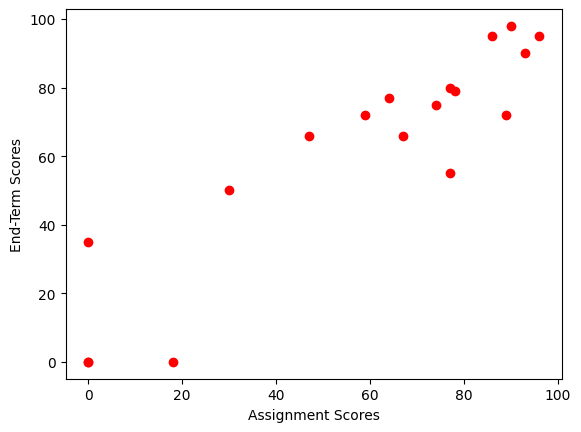

In [125]:
# just a scatter plot of the data

plt.scatter(x, y, color = 'red')
plt.xlabel('Assignment Scores')
plt.ylabel('End-Term Scores')

In [126]:
# importing the Linear Regression model
from sklearn.linear_model import LinearRegression

# getting the model and fitting it to the data

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [127]:
# Getting Results
# coefficients of the Linear Regression

print('Linear Model Coeff (m) =' , model.coef_)
print('Linear Model Coeff (b) =' , model.intercept_)

Linear Model Coeff (m) = [[0.87264654]]
Linear Model Coeff (b) = [10.72690915]


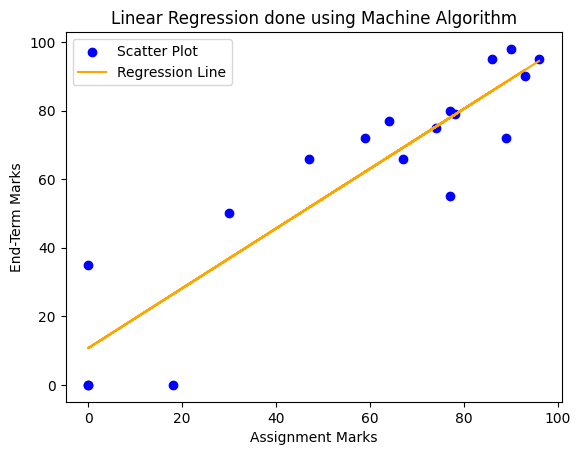

In [128]:
# plotting the output

%matplotlib inline
plt.scatter(x, y, color = 'blue', label = 'Scatter Plot')
reg_lin = model.coef_ * x_train + model.intercept_
plt.plot(x, reg_lin, color = 'orange', label = 'Regression Line') 
plt.xlabel('Assignment Marks')
plt.ylabel('End-Term Marks')
plt.title('Linear Regression done using Machine Algorithm')
plt.legend()
plt.show()

# Using Matrix Multiplication
Now, I will use the matrix multiplication form and get the slope and intercept of the linear regression.

In [129]:
# converting numpy arrays into matrices

mat_x = np.column_stack((x_train, np.ones_like(x_train)))
mat_y = y.reshape(-1, 1)

In [130]:
# doing the matrix multiplication to find the slope and the intercept
# (b, m) = ((X^T * X)^-) * (X^T * Y)
# mat_a = np.dot(mat_x.T, mat_x)
# mat_b = np.dot(mat_x.T, mat_y)

mat_fin = np.dot(np.linalg.inv(np.dot(mat_x.T, mat_x)), np.dot(mat_x.T, mat_y))
print(mat_fin)

[[ 0.87264654]
 [10.72690915]]


In [131]:
# checking the matrix 

print(mat_fin[0,0], mat_fin[1, 0])

0.8726465409592189 10.726909149867566


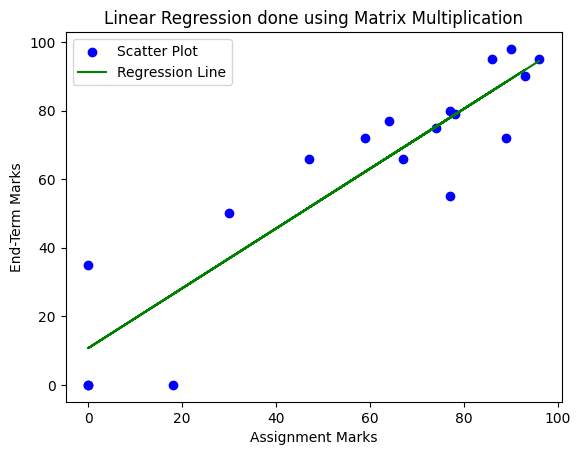

In [132]:
# plotting the output

%matplotlib inline
plt.scatter(x, y, color = 'blue', label = 'Scatter Plot')
reg_line = mat_fin[0,0] * x_train + mat_fin[1,0]
plt.plot(x, reg_line, color = 'green', label = 'Regression Line') 
plt.xlabel('Assignment Marks')
plt.ylabel('End-Term Marks')
plt.title('Linear Regression done using Matrix Multiplication')
plt.legend()
plt.show()

# Comparison
Looking at the plots, it is imperative that both methods yield coefficients that are very similiar to each other, correct to significant decimal values. Given below is a comparative graph of the data points and the regression lines drawn from the two methods.

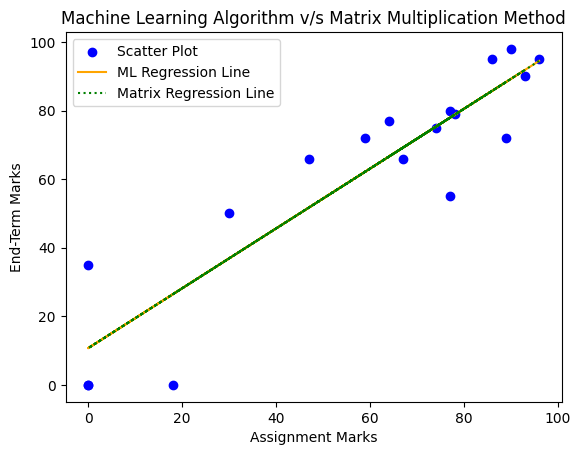

In [133]:
# Plotting the comparison

plt.scatter(x, y, color = 'blue', label = 'Scatter Plot')
reg_lin = model.coef_ * x_train + model.intercept_
plt.plot(x, reg_lin, color = 'orange', label = 'ML Regression Line') 
reg_line = mat_fin[0,0] * x_train + mat_fin[1,0]
plt.plot(x, reg_line, color = 'green', linestyle = 'dotted', label = 'Matrix Regression Line') 
plt.xlabel('Assignment Marks')
plt.ylabel('End-Term Marks')
plt.title('Machine Learning Algorithm v/s Matrix Multiplication Method')
plt.legend()
plt.show()

**In this case, it's interesting to note that the coefficients obtained from the matrix multiplication method match those obtained from the machine learning algorithm. This consistency is expected because both methods are essentially solving the same linear regression problem.**

# Conclusion
In this study, we explored and compared two methods for linear regression: the traditional machine learning approach using scikit-learn and a novel method based on matrix multiplication. The objective was to predict end-term marks based on assignment marks.

**Machine Learning Algorithm**
Using the scikit-learn library, we trained a linear regression model on our dataset. The resulting coefficients for the linear model were found to be:

Slope (m): 0.8726\
Y-intercept (b): 10.7269\
The regression equation,\ 
End-Term Marks = 0.8726 × Assignment Marks + 10.7269\
End-Term Marks = 0.8726 × Assignment Marks + 10.7269, accurately captures the relationship between assignment marks and end-term marks as learned by the machine learning algorithm.

**Matrix Multiplication Method**
An alternative approach involved solving the linear regression problem through matrix multiplication. The resulting coefficients obtained were remarkably consistent with those from the machine learning algorithm:

Slope (m): 0.8726\
Y-intercept (b): 10.7269\
This not only validates the accuracy of our machine learning model but also demonstrates the equivalence between the two methods in solving the linear regression problem.\

**Conclusion and Implications**
The successful alignment of coefficients from both methods reinforces our confidence in the accuracy of the linear regression model. This study has practical implications, showcasing that the mathematical foundation of linear regression can be leveraged through matrix manipulation, providing an alternative avenue for those seeking a deeper understanding of the underlying principles.

As we move forward, this exploration opens avenues for further investigation into the relationships between various machine learning algorithms and their mathematical counterparts. Additionally, it emphasizes the importance of understanding the fundamental operations that power these algorithms.

In conclusion, our study highlights the synergy between traditional machine learning approaches and mathematical techniques, offering valuable insights for both practitioners and enthusiasts in the field.